# Air Quality Index Prediction

### Problem Statement

As India is developing economy from Industrialization perspective. Development may be good for the nation in terms of GDP and economic gain, but it also has a flipside as more and more industries are being established, they are emitting more smoke, pollutants and Particulate Matter (PM) into the air which is increasing Air pollution. Air Pollution is causing diseases such as Asthma, Lung Cancer and other cardiovascular diseases. Air pollution is being measured by AQI (Air Quality Index) and higher the AQI higher the air pollution. In this project we will analyze the air quality data of major developed/ developing cities in India to find some underlying principles or patterns which will help us in predicting the AQI with the given data. Since this data has been captured at specific intervals over a period of time we will be conducting a Time Series Analysis to predict the AQI of a city at a point in time.

### Feature Description


1. PM2.5: It refers to particles that have diameter less than 2.5 micrometers(more than 100 times thinner than human air) and remain suspended for longer. These particles are formed as a result of burning fuel and chemical reactions that take place in the atmosphere.

2. PM10: PM10 are the particles with a diameter of 10 micrometers and they are also called fine particles. An environmental expert says that PM10 is also known as respirable particulate mattter.Particulate matter is a complex mixture of soot,smoke,metals,nitrates,sulphates,dust water and rubber etc

3. NO: Nitric oxide is not considered to be hazardous to health at typical ambient concentrations, but nitrogen dioxide can be. ... NOx gases react to form smong and acid rain as well as being central to the formation of fine particles(PM) and ground level ozone.

4. NO2: Nitrogen dioxide is part of a group of gaseous air pollutants produced as a result of road traffic and other fossil fuel combustion processes. Its presence in air pollutants.

4. NH3: Gaseous ammonia (NH3) is the most abundant alkaline gas in the atmosphere. NH3 plays a significant role int he formation of atmospheric particulate matter,visibility degradation and atmospheric deposition of nitrogen to sensitive ecosystem.

4. CO: It is produced in the incomplete combustion of carbon-containing fuels such as gasoline,natural gas,oil,coal and wood.

5. SO2: It is formed when fuel containing sulphur such as coal and oil, is burned,creating air pollution. It affect the environment when they react with substances in the atmosphere to form acid rain.

6. O3: It is harmful to air quality outside of the ozone layer.Ground level ozone is a colorless and highly irritating gas that forms just above the earth's surface.

7. Benzene:The benzene in indoor comes from product that contain benzene such as glues,paints , furniture wax , and detergents.The air around hazardous waste sites or gas stations can contain higher level of benzene than in other areas.

8. Toluene: Motor vehicle and industrial emmissions are the major sources of pollutants .

9. Xylene: Motor vechicle emissions are the predominant source of xylene in the urban air environment. Evaporation from petroleum fuel storage facilities and service stations.

10. AQI: The air quality index is an index for reporting air quality on a daily basis. It is a measure of how air pollution affects one's health with in short time period. The purpose of the AQI is to help kow how the local air quality impacts their health.

11. AQI_Bucket: it is variable of AQI.

### Importing Libraries

In [1]:
# For data reading | manipulation :
import pandas as pd 

# For reading the array :
import numpy as np

# For visualize the data and plottting patameters :
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,8]
import seaborn as sns

# To suppress warnings :
from warnings import filterwarnings
filterwarnings('ignore')

# Import train-test split :
from sklearn.model_selection import train_test_split

# Import 'stats' libraries for modeling :
from scipy import stats
import statsmodels.api as sm
from statsmodels.api import OLS

# To scaled the data :
from sklearn.preprocessing import StandardScaler

# To check the accuracy of model :
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Import Statsmodels :
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.arima_model import ARIMA

### Load and Read the Data

In [2]:
# Read the data :
AQI_city_hour = pd.read_csv('city_hour.csv')


# Print the first five observations to see the data structure :
AQI_city_hour.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


### Understand the Data

In [3]:
# Checking shape and data types of the data :

AQI_city_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  Benzene     544229 non-null  float64
 12  Toluene     487268 non-null  float64
 13  Xylene      252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


#### Interpretation 

* From the above information, dataset have 3 Categorical variables and 13 Numerical variables.
* The data have total 16 variables and 707875 records.

In [4]:
# Summary Statistics of the numeric data :

AQI_city_hour.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,562787.000000,411138.000000,591243.000000,590753.000000,584651.000000,435333.000000,621358.000000,577502.000000,578667.000000,544229.000000,487268.000000,252046.000000,578795.000000
mean,67.622994,119.075804,17.421755,28.885157,32.287565,23.607959,2.183539,14.038307,34.798979,3.087595,8.660927,3.130537,166.413500
std,74.730496,104.224752,32.095211,29.162194,39.756669,28.831900,10.970514,19.305540,29.806379,16.456599,21.741023,7.834832,162.112729
min,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,26.200000,52.380000,3.840000,10.810000,10.660000,8.120000,0.420000,4.880000,13.420000,0.050000,0.370000,0.100000,79.000000
50%,46.420000,91.500000,7.960000,20.320000,20.790000,15.380000,0.800000,8.370000,26.240000,0.860000,2.590000,0.790000,116.000000
75%,79.490000,147.520000,16.150000,36.350000,37.150000,29.230000,1.370000,14.780000,47.620000,2.750000,8.410000,3.120000,208.000000
max,999.990000,1000.000000,499.990000,499.510000,498.610000,499.970000,498.570000,199.960000,497.620000,498.070000,499.400000,499.990000,3133.000000


#### Interpretation 

* Summary statistics give maximum, minimum, average, first and third qurtile and standared deviation of the data. 
* Most of the variables having minimum value as 0.

## Health impact of AQI

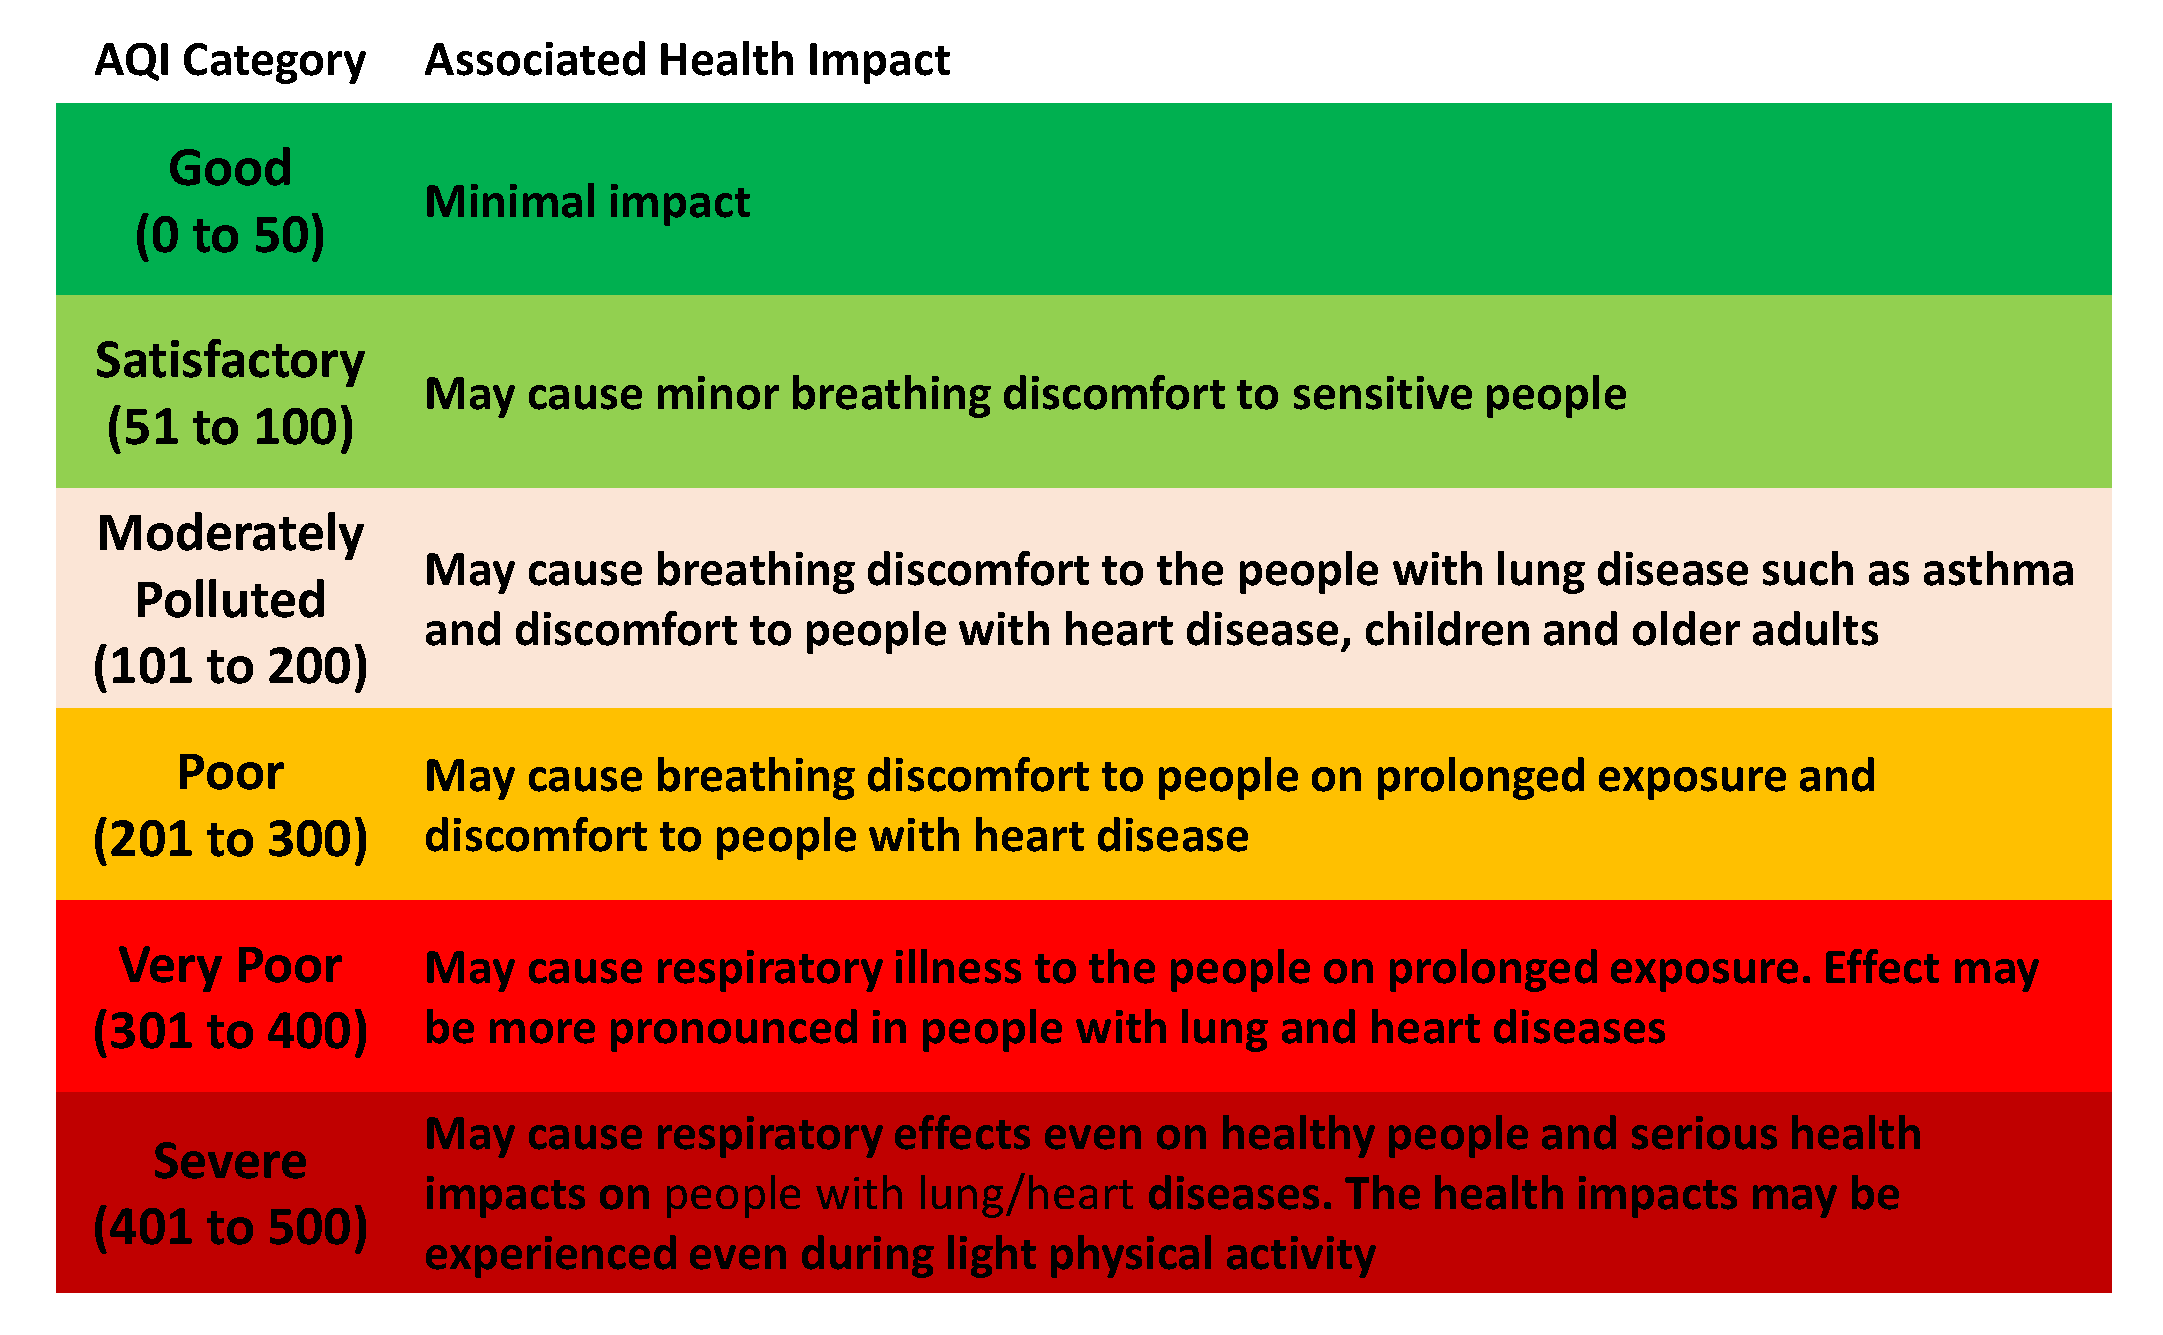

In [5]:
from IPython import display 
display.Image("http://www.indiatogether.org/uploads/picture/image/2590/IT_airquality.png")

### Data preparation and cleaning

In [6]:
# Checking for the missing values and its precentage :

values = AQI_city_hour.isnull().sum()
percentage = 100*AQI_city_hour.isnull().sum()/len(AQI_city_hour)
table = pd.concat([values,percentage.round(2)],axis=1)
table.columns = ['No of missing values','Percent of missing values']
table[table['No of missing values']!=0].sort_values('Percent of missing values',ascending=False).style.background_gradient('OrRd')

,No of missing values,Percent of missing values
Xylene,455829,64.390000
PM10,296737,41.920000
NH3,272542,38.500000
Toluene,220607,31.160000
Benzene,163646,23.120000
PM2.5,145088,20.500000
SO2,130373,18.420000
O3,129208,18.250000
AQI,129080,18.230000
AQI_Bucket,129080,18.230000


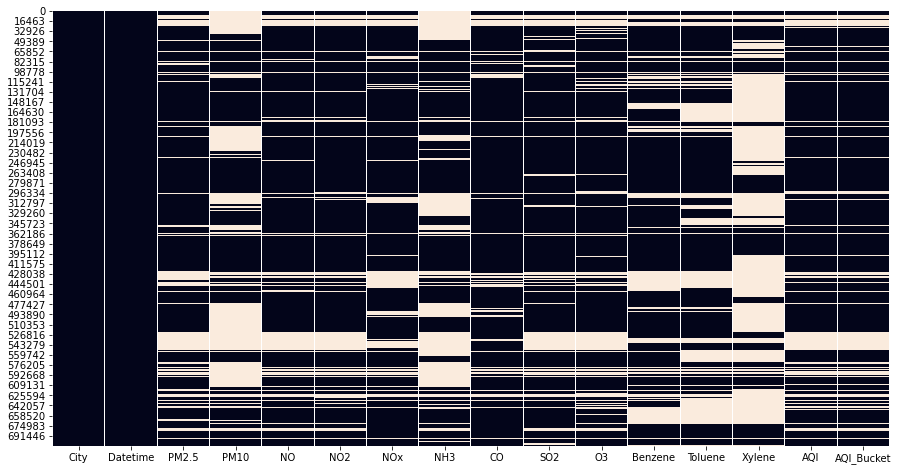

In [7]:
# Check the missing values with heatmap :

sns.heatmap(AQI_city_hour.isnull(), cbar=False)
plt.show()


### Interpretation 

* From the above heatmep, we can say that many missing values are present in the dataset. 
* We cannot remove the missing rows from the dataset as we will miss on timestamps.
* From the observation, we notice that most of the data before the year 2017 is missing. 
* We will impute the values by city and day

In [8]:
# Try methods to impute missing values :

AQI_city_hour.groupby(['City', 'Datetime'])['AQI'].mean()


City           Datetime           
Ahmedabad      2015-01-01 01:00:00     NaN
               2015-01-01 02:00:00     NaN
               2015-01-01 03:00:00     NaN
               2015-01-01 04:00:00     NaN
               2015-01-01 05:00:00     NaN
                                      ... 
Visakhapatnam  2020-06-30 20:00:00    51.0
               2020-06-30 21:00:00    51.0
               2020-06-30 22:00:00    50.0
               2020-06-30 23:00:00    50.0
               2020-07-01 00:00:00    50.0
Name: AQI, Length: 707875, dtype: float64

## Interpretations

* We cannot impute the missing values with group by datetime and its average, because dataset has missing values for continuous 3-4 days. 
* Let us try to impute missing values with average of day. 
* We will first convert Datetime variable into datetime data type.

In [9]:
# Converting Datetime variable into datetime data type :

AQI_city_hour['Datetime'] = AQI_city_hour['Datetime'].apply(pd.to_datetime)

In [10]:
# Check whether it is converted or not :

AQI_city_hour.dtypes

City                  object
Datetime      datetime64[ns]
PM2.5                float64
PM10                 float64
NO                   float64
NO2                  float64
NOx                  float64
NH3                  float64
CO                   float64
SO2                  float64
O3                   float64
Benzene              float64
Toluene              float64
Xylene               float64
AQI                  float64
AQI_Bucket            object
dtype: object

* Datetime variable is changed into datetime datatype.

In [11]:
# Impute the missing values by grouping city with and average of 5 days:

data_fill = AQI_city_hour.iloc[:, :15].fillna(AQI_city_hour.iloc[:, :15].groupby(['City', pd.Grouper(key='Datetime', freq='5D')]).transform('mean'))

In [12]:
# After inputing missing values by day checking for the missing values :

values = data_fill.isnull().sum()
percentage = 100*data_fill.isnull().sum()/len(data_fill)
table = pd.concat([values,percentage.round(2)],axis=1)
table.columns = ['No of missing values','Percent of missing values']
table[table['No of missing values']!=0].sort_values('Percent of missing values',ascending=False).style.background_gradient('Purples')

,No of missing values,Percent of missing values
Xylene,422300,59.660000
PM10,251761,35.570000
NH3,233646,33.010000
Toluene,177177,25.030000
Benzene,117080,16.540000
PM2.5,95633,13.510000
NOx,88689,12.530000
AQI,87714,12.390000
O3,76756,10.840000
SO2,73152,10.330000


* Still the missing values are present in the data, let's try to fill with average of month.

In [13]:
# Impute the missing values by grouping city and month :

data_fill = data_fill.fillna(data_fill.groupby(['City', pd.Grouper(key='Datetime', freq='M')]).transform('mean'))

In [14]:
# After inputing missing values by month check for the missing values :

values = data_fill.isnull().sum()
percentage = 100*data_fill.isnull().sum()/len(data_fill)
table = pd.concat([values,percentage.round(2)],axis=1)
table.columns = ['No of missing values','Percent of missing values']
table[table['No of missing values']!=0].sort_values('Percent of missing values',ascending=False).style.background_gradient('Blues')

,No of missing values,Percent of missing values
Xylene,408260,57.670000
PM10,229569,32.430000
NH3,213446,30.150000
Toluene,161505,22.820000
Benzene,95752,13.530000
PM2.5,73490,10.380000
NOx,71934,10.160000
AQI,62217,8.790000
O3,50652,7.160000
NO2,49304,6.970000


## Interpretations

* Still missing values are present in the data, now we can not fill it by average of year, if we fill the value by average of year the data integrity will be changed, so we concidered that value of the pollutants are same throughout the month. So we can use the backward or forward fill technique for imputing the missing values.

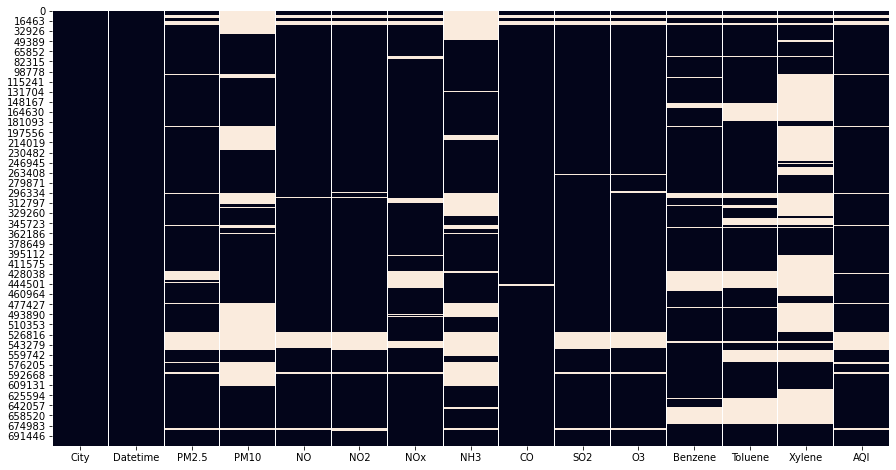

In [15]:
sns.heatmap(data_fill.isnull(), cbar=False)
plt.show()

In [16]:
# Imputing missing values by beckward fill :

data_fill = data_fill.fillna(method = 'bfill',axis=0)

In [17]:
# Still data is missing in the columns, hence using forward fill to impute this :

data_fill = data_fill.fillna(method = 'ffill',axis=0)

In [18]:
# After inputing missing values by bfill abd ffill:

values = data_fill.isnull().sum()
percentage = 100*data_fill.isnull().sum()/len(data_fill)
table = pd.concat([values,percentage.round(2)],axis=1)
table.columns = ['No of missing values','Percent of missing values']
table[table['No of missing values']!=0].sort_values('Percent of missing values',ascending=False).style.background_gradient('Blues')

,No of missing values,Percent of missing values


In [19]:
# After imputing missing values, check summary statistics of the data :

data_fill.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000,707875.000000
mean,67.386893,118.578434,21.481073,27.211302,34.774738,23.787998,3.259522,18.676132,33.270699,3.588802,7.988411,4.461357,168.198778
std,72.276314,100.615182,35.795178,28.053624,39.253794,25.237833,14.006621,26.624725,28.170868,16.905402,20.055663,6.974015,157.552910
min,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,25.498000,55.750000,4.180000,9.630000,11.670000,8.080000,0.420000,5.050000,14.490000,0.050000,0.340000,0.100000,81.922700
50%,45.740000,86.000000,8.760000,19.140000,23.240000,18.090000,0.830000,8.880000,24.800000,1.080000,2.320000,1.600000,116.500000
75%,83.050000,149.640000,19.890000,34.560000,42.290000,35.450000,1.500000,17.570000,44.290000,3.920000,9.190000,6.090000,218.000000
max,999.990000,1000.000000,499.990000,499.510000,498.610000,499.970000,498.570000,199.960000,497.620000,498.070000,499.400000,499.990000,3133.000000


*  After imputing missing values by this method, mean and the standard deviation is not much changed.

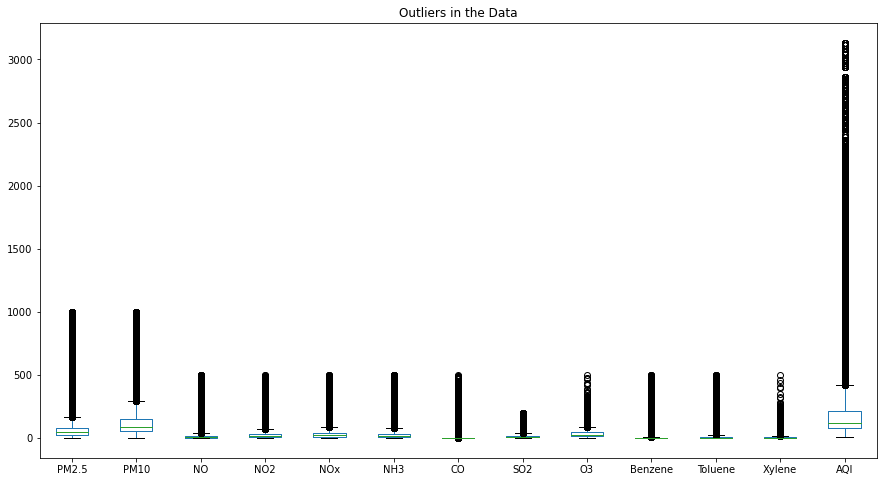

<Figure size 1080x576 with 0 Axes>

In [20]:
# Checking for outliers :

data_fill.plot(kind='box')
plt.title("Outliers in the Data")
plt.show()
plt.savefig('Outliers.png', dpi=300, bbox_inches='tight')

### Interpretation

* From the box plot, can say that the outliers are present in the data, but this is the time series data.
* So we can not remove outliers, if we do this the continuity will not remain for the data.

## Univariate ad Multivariate Month wise Analysis

In [21]:
# In this we are not concidering the AQI_Bucket column, because it is not nessasary for our analysis.
# Here, we do analysis on all over country, so Aggregating the data into month wise and creating the new dataframe.

AQI_df = data_fill.groupby(['City', (data_fill.Datetime.dt.strftime('%Y-%m'))]).mean()

# Reset index :
AQI_df = AQI_df.reset_index()

# Check the First 5 observation :
AQI_df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01,82.895833,137.429822,22.507038,27.030412,39.585462,19.88,22.507038,45.149166,46.578152,1.469680,2.547714,2.977880,320.985577
1,Ahmedabad,2015-02,109.703239,137.429822,19.690032,29.282138,47.106372,19.88,19.690032,59.624493,48.993327,8.069926,21.536881,7.021348,496.074405
2,Ahmedabad,2015-03,109.205160,137.429822,13.956715,28.000604,41.035880,19.88,13.956715,57.189125,45.858677,10.505060,27.147715,4.000328,413.652330
3,Ahmedabad,2015-04,100.724662,137.429822,7.475383,20.798432,27.264574,19.88,7.475383,51.098751,30.500948,3.140573,8.401001,4.501038,300.600569
4,Ahmedabad,2015-05,76.214918,137.429822,8.513048,17.533370,24.813104,19.88,8.513048,35.914560,31.429479,3.745080,11.201914,5.123026,250.872653


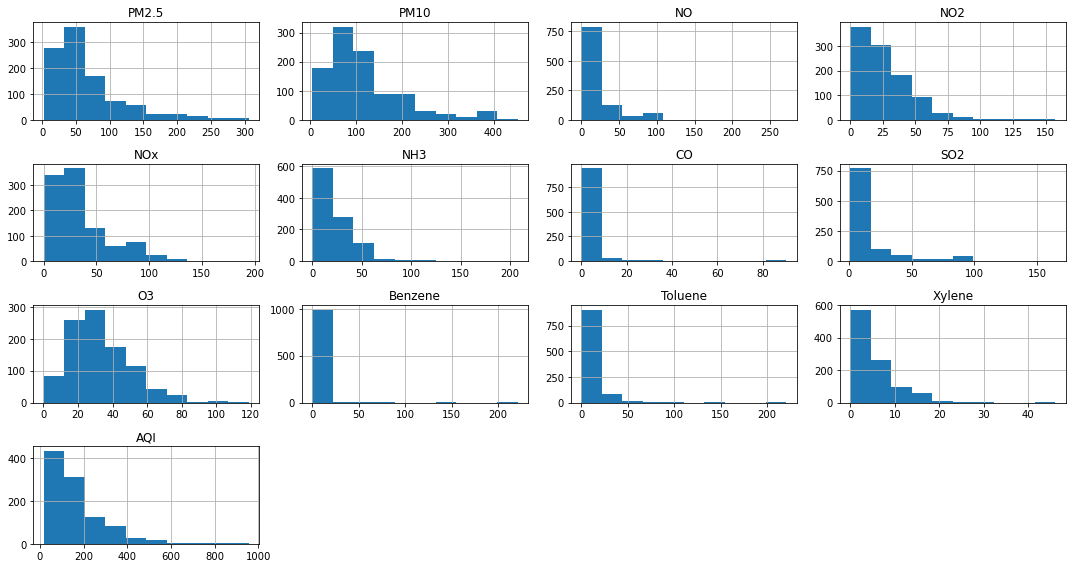

Skewness :
 PM2.5       1.763624
PM10        1.527524
NO          3.184801
NO2         1.905857
NOx         1.504361
NH3         2.870430
CO          6.705676
SO2         2.766052
O3          0.983101
Benzene    13.817042
Toluene     6.049608
Xylene      1.677739
AQI         2.099102
dtype: float64


<Figure size 1080x576 with 0 Axes>

In [22]:
# Check the distribution of the all numerical columns and print skewness of the data :

AQI_df.drop(['City', 'Datetime'], axis=1).hist()
plt.tight_layout()
plt.title("Distribution of Data")
plt.show()
plt.savefig('Distribution of data.png')
# Print the skewness of the data :
print('Skewness :\n', AQI_df.drop(['City', 'Datetime'], axis=1).skew())

### Interpretation:

* From the plot and skewness, can say that the Benzene, Toluene, CO, NO2 are highely skewed and right skewed.

The impact of  PM2.5 on AQI


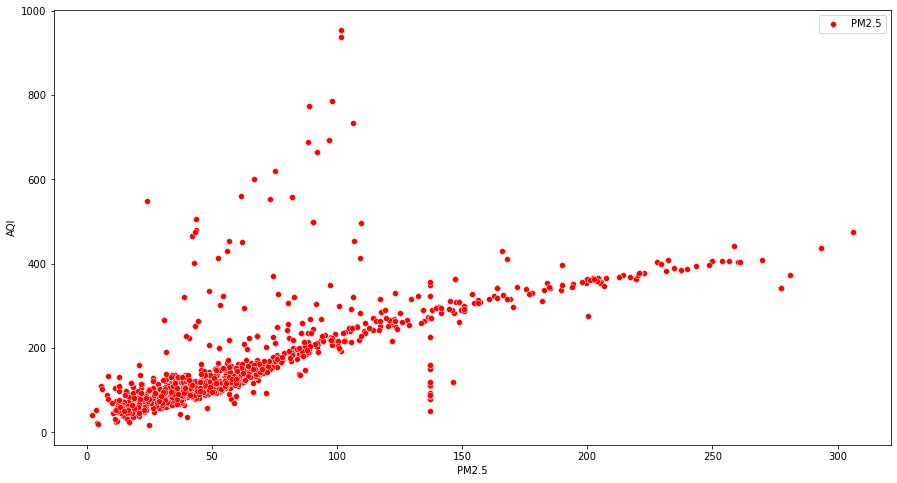

The impact of  PM10 on AQI


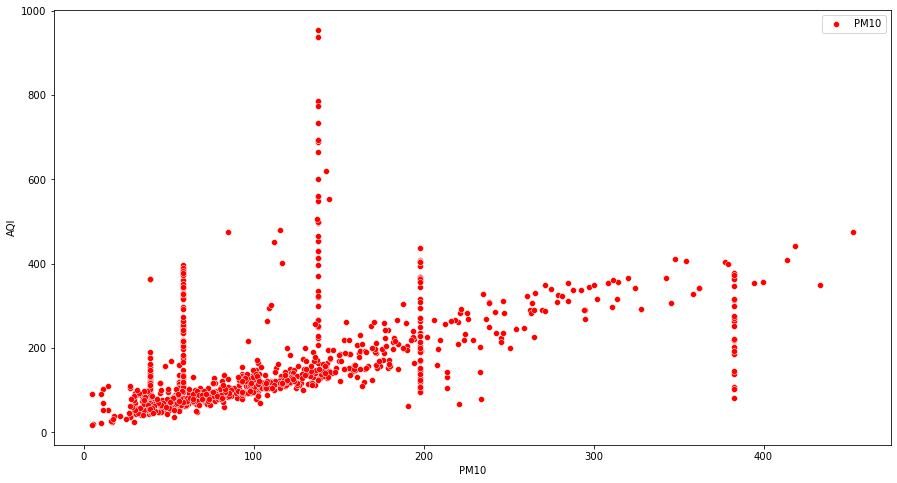

The impact of  NO on AQI


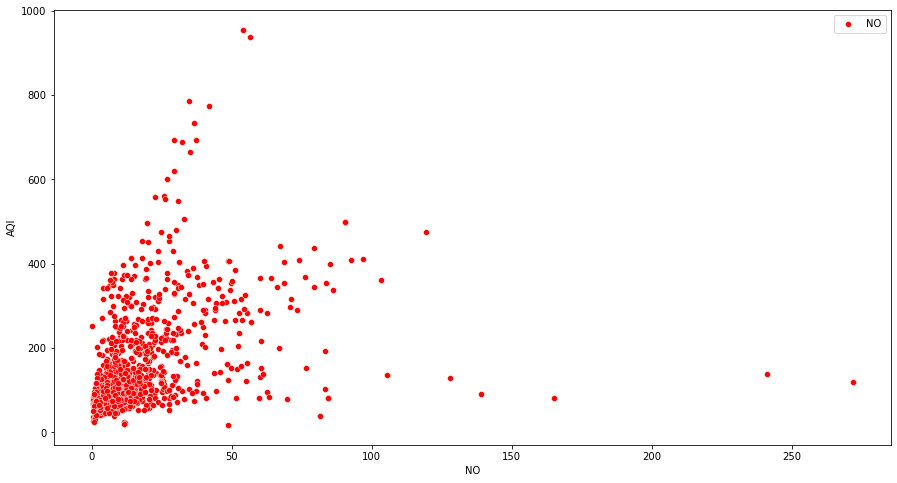

The impact of  NO2 on AQI


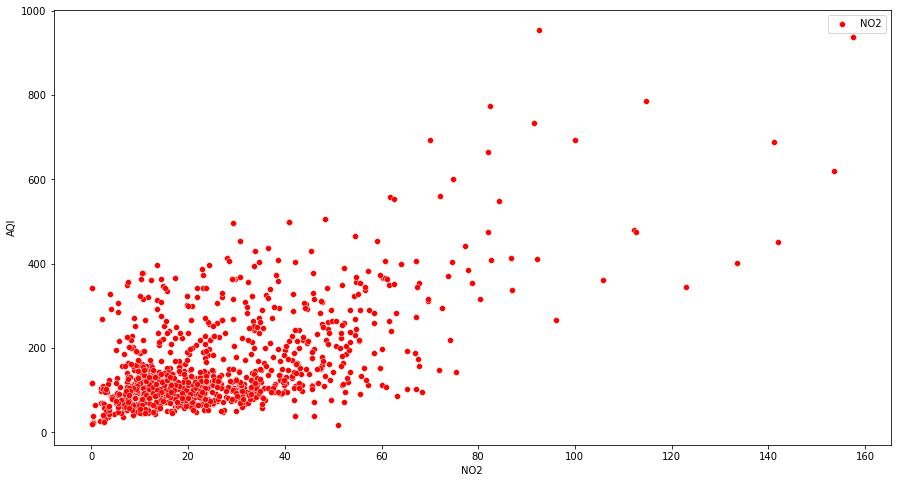

The impact of  NOx on AQI


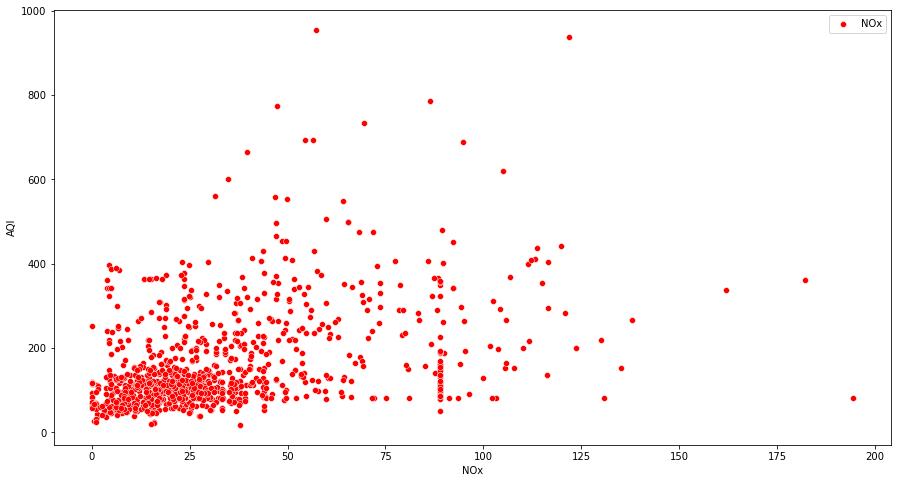

The impact of  NH3 on AQI


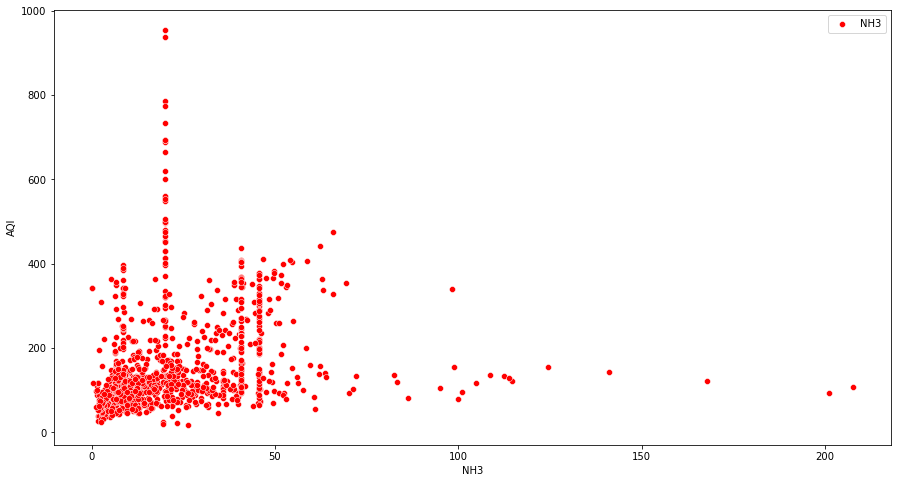

The impact of  CO on AQI


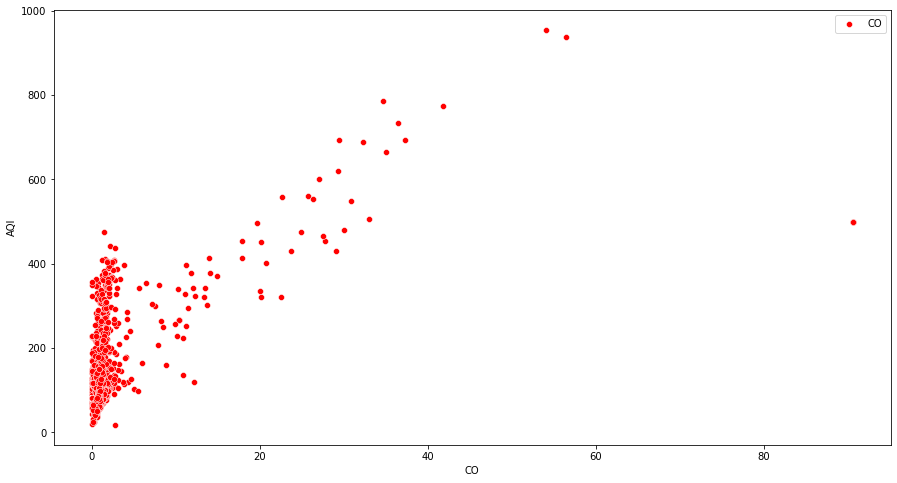

The impact of  SO2 on AQI


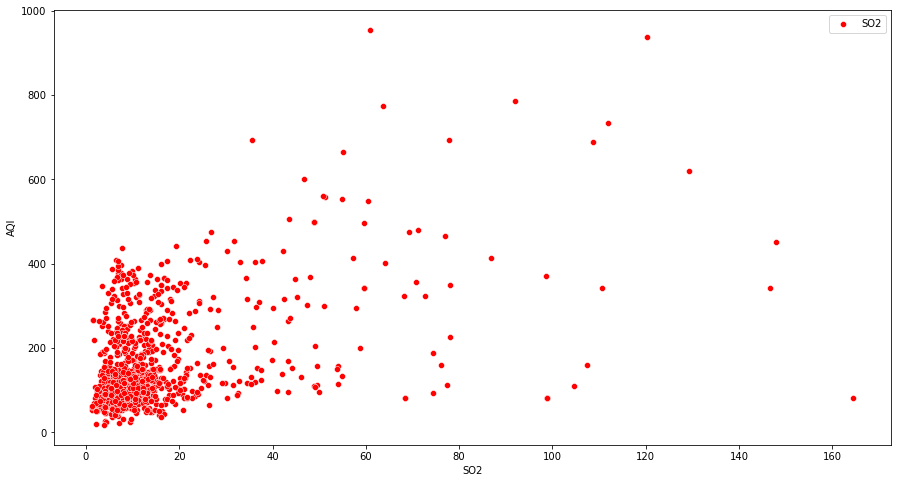

The impact of  O3 on AQI


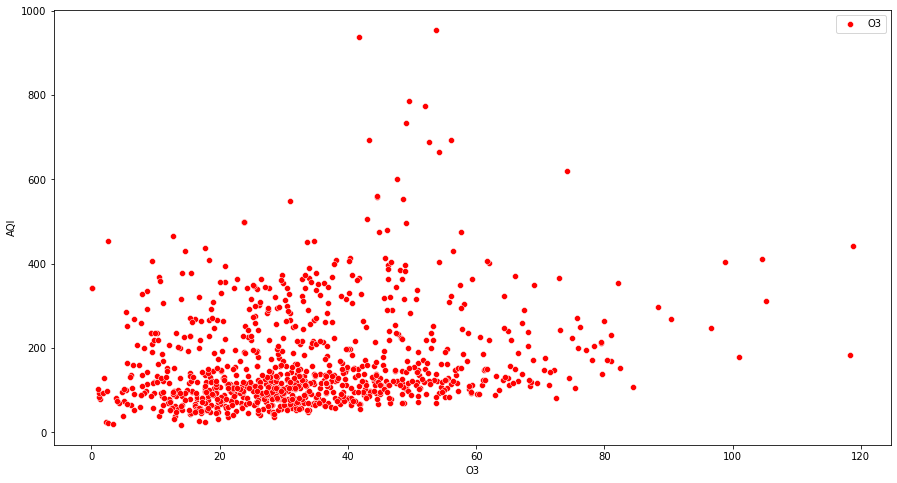

The impact of  Benzene on AQI


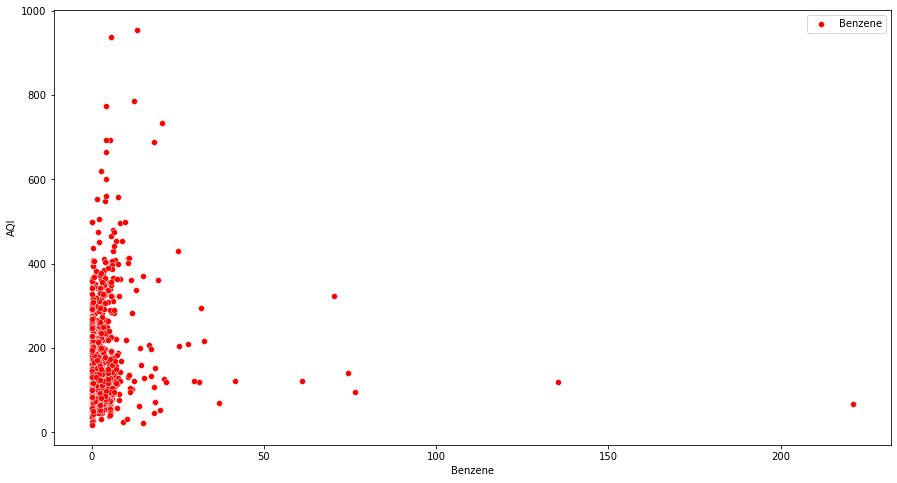

The impact of  Toluene on AQI


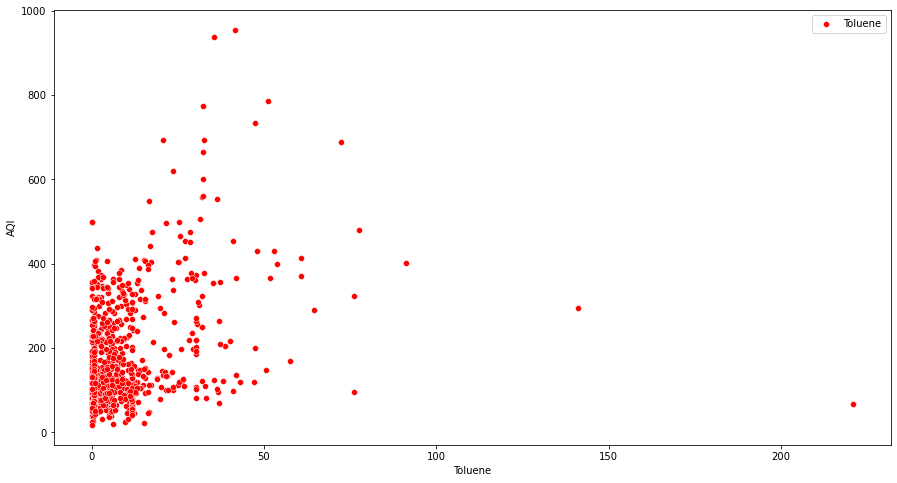

In [23]:
# Check the effect of all pollutants on AQI :

for i in AQI_df.iloc[:, 2:13]:
    print('The impact of ', i, 'on AQI')
    sns.scatterplot(x = i, y ='AQI', data = AQI_df,marker="o",sizes=200,color="r",label=i)
    plt.legend()
    plt.show()


### Interpretations:

* From the scatterplot, can say that the PM2.5, PM10, CO has positive correlation with AQI.
* It means, when pollutants increse, the AQI increases.
* We will find the relationship of other variables usign heatmap

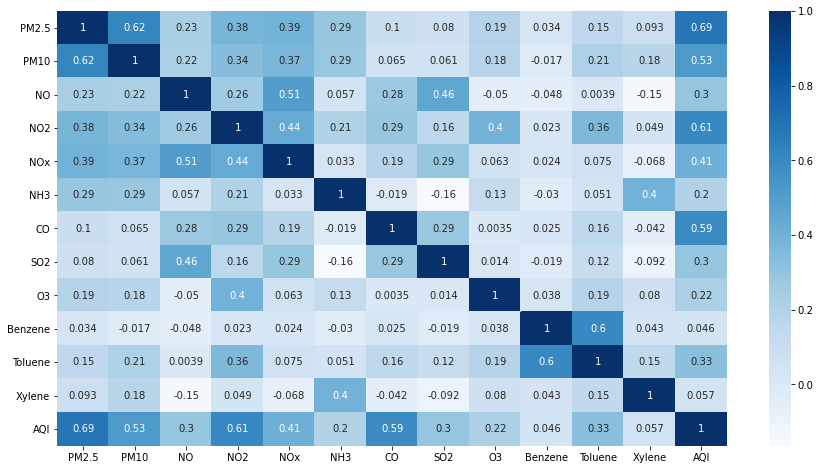

In [24]:
# Correlation of the numerical data with heatmap :

sns.heatmap(AQI_df.corr(), annot=True, cmap='Blues')
plt.show()

### Interpretations:

* From the heatmap, we can say that other pollutants doest not affect the AQI much.
* They have the positive correlation with AQI but not strong correlation.
* PM2.5 and PM10 has good positive correlation between them.
* Also Toluene and Benzene have high correlation.

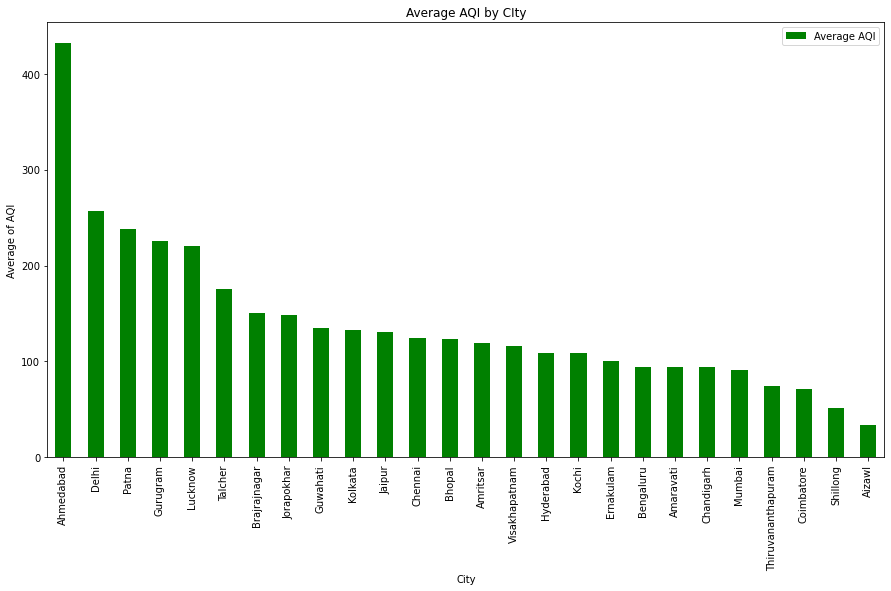

In [25]:
# Check the citywise average of AQI :

AQI_df.groupby('City')['AQI'].mean().sort_values(ascending=False).plot(kind='bar',color="g",label="Average AQI")
plt.ylabel('Average of AQI')
plt.title("Average AQI by CIty")
plt.legend()
plt.show()

### Interpretations:

* From the plot, we can say that Ahmedabad city has very high average of AQI through out 5 years, then Delhi, Patna, Gurugram.
* Aizawl has very less average of AQI, maybe the reason is mountainous area.

### Visualize the Time Series Data

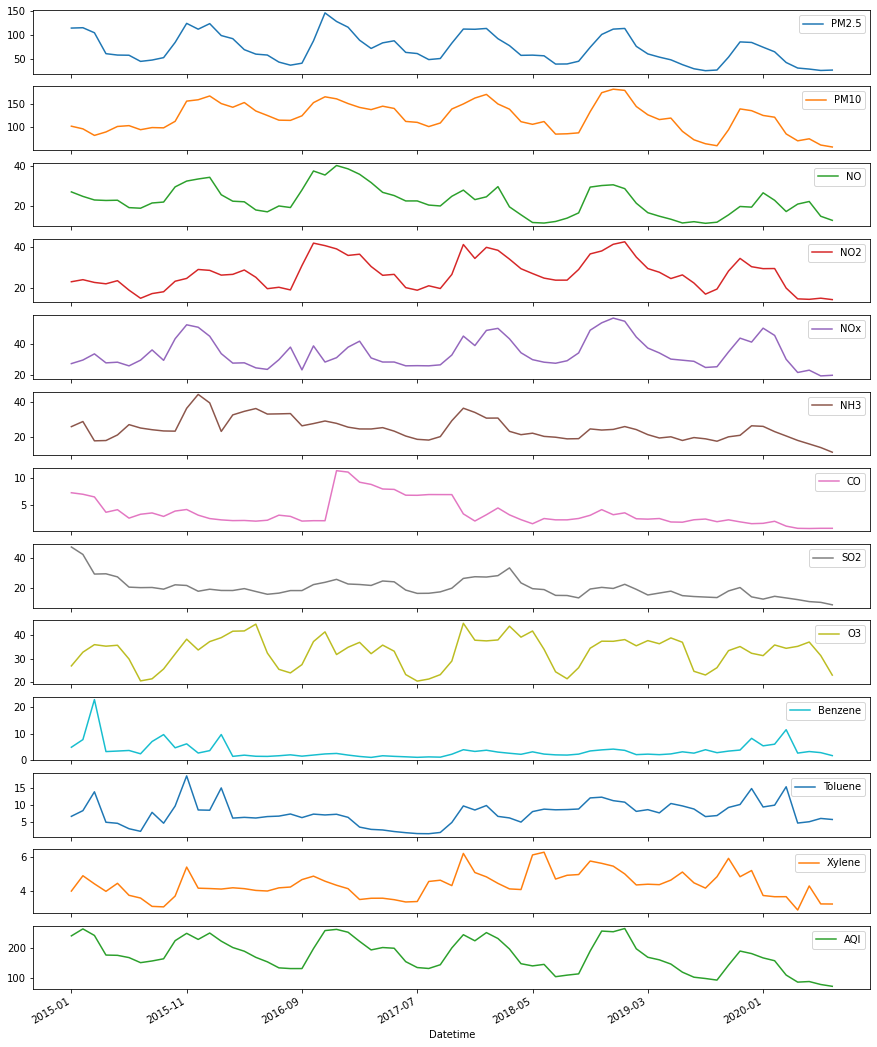

In [26]:
# Yearly and Monthly Visualisation.

AQI_df.groupby(['Datetime']).mean().plot(kind='line', figsize=(15,20), subplots=True)

plt.show()

### Interpretations:

* We can see that the graph decrease for AQI after 01-2020, reason for this is covid pandemic 
* Infact all pollutants are decrease after Jan-2020.

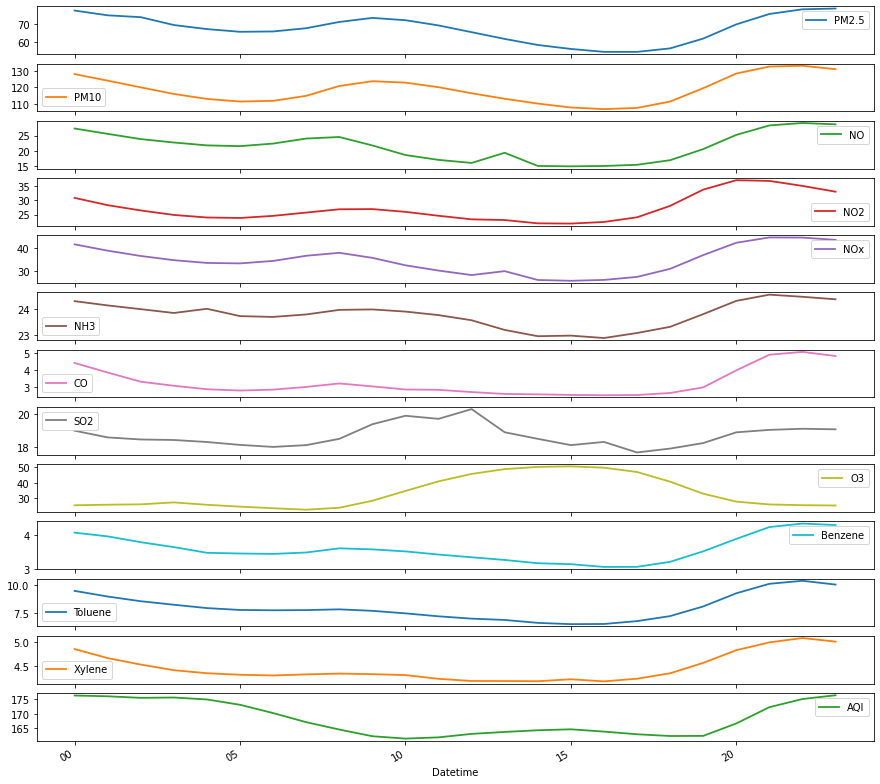

In [184]:
# Hourly Visualisations

data_fill.groupby(data_fill.Datetime.dt.strftime('%H')).mean().plot(kind='line', figsize=(15,15), subplots=True,linewidth=1.8)
plt.show()

### Interpretations:

* From the plot, can say that the AQI is high during the night and low at mid day.
* All other polluatans are high at night and low at mid day.



# Summary

* The data was collected from the website of Central Pollution Board.
* The data is from the year 2015 to 2020 and the dimensions are 707875 records and 13 features.
* There were many missing values in the data which were treated using groupby of city with 5 days frequency and forward and backward fill.
* The outliers were checked but we considered not to remove them due to loss in data continuity.
* All the columns were numeric due to which we checked the distribution of the features to check whether data is skewed or not.
* The effect of each pollutant was checked on AQI using Correlation matrix as well as Scatter plot. 
* The average AQI was checked city wise.
* Visualisation of time series month wise and hour wise.

## Statistical Tests

* To start working with time series, let's perform statistical test.
* Here, we have only numerical columns, so we performed the Anova test, and checked which pollutants are affecting more on AQI.
* We are using ordinary least square method to check the effect of pollutants on AQI.
* ANOVA is helpful for testing three or more variables.

In [28]:
# First seperate target and independent variables :
X = AQI_df.drop(['City', 'Datetime', 'AQI'], axis=1)
X = sm.add_constant(X)
y = AQI_df.AQI

# Fitting the model
model = OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AQI   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     407.5
Date:                Tue, 30 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:18:19   Log-Likelihood:                -5356.7
No. Observations:                1005   AIC:                         1.074e+04
Df Residuals:                     992   BIC:                         1.080e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.0874      4.320      3.492      0.001       6.609      23.566
PM2.5          1.1134      0.041     27.364      0.000       1.034       1.193
PM10           0.1600      0.026      6.229      0.000       0.110       0.210
NO            -0.3533      0.082     -4.292      0.000      -0.515      -0.192
NO2            1.2614      0.108     11.715      0.000       1.050       1.473
NOx           -0.0026      0.075     -0.034      0.973      -0.150       0.145
NH3            0.0925      0.092      1.008      0.313      -0.087       0.272
CO             5.1173      0.164     31.156      0.000       4.795       5.440
SO2            0.5513      0.080      6.877      0.000       0.394       0.709
O3            -0.0102      0.100     -0.102      0.919      -0.206       0.186
Benzene       -0.6260      0.212     -2.953      0.003      -1.042      -0.210
Toluene        0.9736      0.170      5.730      0.000       0.640       1.307
Xylene        -0.4545      0.329     -1.381      0.168      -1.100       0.191
==============================================================================
Omnibus:                      301.594   Durbin-Watson:                   0.526
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2564.304
Skew:                           1.126   Prob(JB):                         0.00
Kurtosis:                      10.495   Cond. No.                         478.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# Print significant variables which are most affect on AQI :

significant = model.pvalues[model.pvalues < 0.05].sort_values(ascending=True)

print('Significant vaeiables which more affect on AQI :\n', significant)

Significant vaeiables which more affect on AQI :
 CO         3.739531e-149
PM2.5      2.786849e-123
NO2         8.866718e-30
SO2         1.081402e-11
PM10        6.922222e-10
Toluene     1.334997e-08
NO          1.945753e-05
const       5.003062e-04
Benzene     3.216787e-03
dtype: float64


### Interpretations:

* The pollutants CO, PM2.5, NO2 and SO2 are affecting the most on AQI
* Benzene and NO are least significant.

## Stationarity

* Stationarity is an important concept in time series analysis. 
* Stationarity means that the statistical properties of a time series do not change over time. 
* Stationarity is important because many useful analytical tools and statistical tests and models rely on it.

**Let's check for stationarity with adfuller(Dickey Fuller) test for AQI :**

* $H_0$ : Data is non-stationary.
* $H_1$ : Data is stationary

In [30]:
# Import the library :
from statsmodels.tsa.stattools import adfuller

# Perform the test :
adfuller(AQI_df.AQI)

(-3.861332015277608,
 0.002338588461578104,
 15,
 989,
 {'1%': -3.436979275944879,
  '5%': -2.8644668170148058,
  '10%': -2.5683283824496153},
 10660.987916590571)

### Interpretations:

* Here, pvalue is < 0.05, hence we reject the $H_0$
* This means that data is stationary.

## Time Series Decomposition

In [31]:
# Before this, Convert Datetime variable into Datetime data type in new dataframe AQI_df :

AQI_df['Datetime'] = AQI_df['Datetime'].apply(pd.to_datetime)

* We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality and noise.

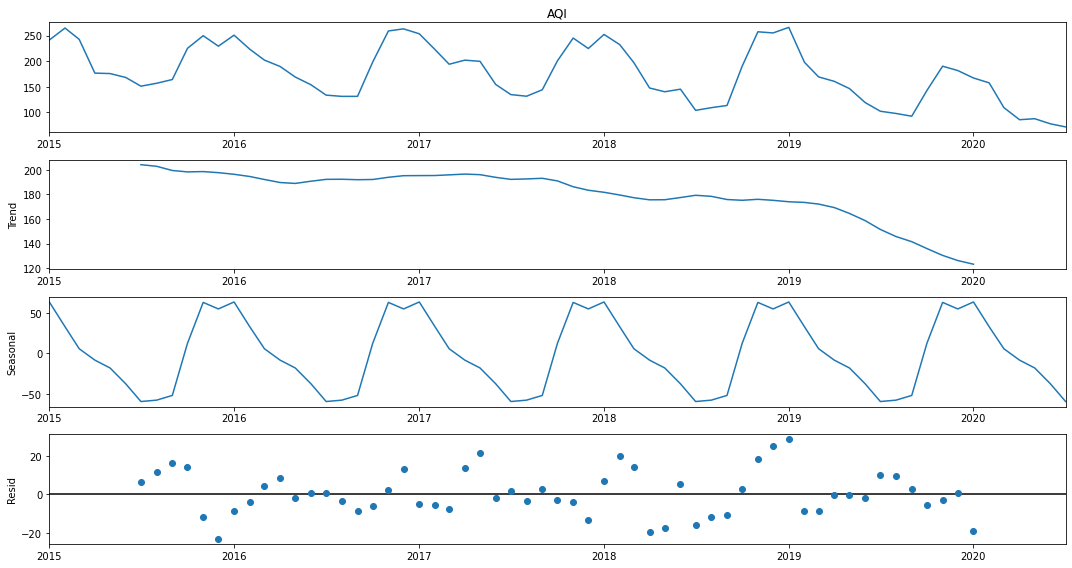

In [32]:
# Remove city from the dataframe as it is a Categorical column :
df = AQI_df.drop('City', axis=1)

# Set Datetime as index :
df.set_index('Datetime', inplace=True)

# Do groupby Datetime for average of AQI :
df1 = df.groupby('Datetime')['AQI'].mean()

# Decompose the time series :
decomposition = sm.tsa.seasonal_decompose(df1, model='additive')
fig = decomposition.plot()
plt.show()

### Interpretations:

* The uppermost graph gives us Observed values in the data.

**Trend**
* Next three graphs are Trend, Seasonality and Residuals.
* By looking at the trend in the data, we can see that the trend is decreasing gradually year by year and there is sudden decrease after 2019.

**Seasonality**
* Seasonality is the presence of variations that occur at specific regular intervals less than a year
* Seasonality may be caused by weather and consists of periodic, repetitive, and generally regular and predictable patterns in the levels of a time series.
* Here, in the mid year, the AQI value is decreasing.

**Residual**
* The data points which dosen't follow trend as well as seasonality, are plotted in the residual graph.

### ACF and PACF plot

* ACF is stands for Autocorrelation Function and PACF for Partial Autocorrelation Function. 
* ACF and PACF plots gives the lag value for AR and MA model.

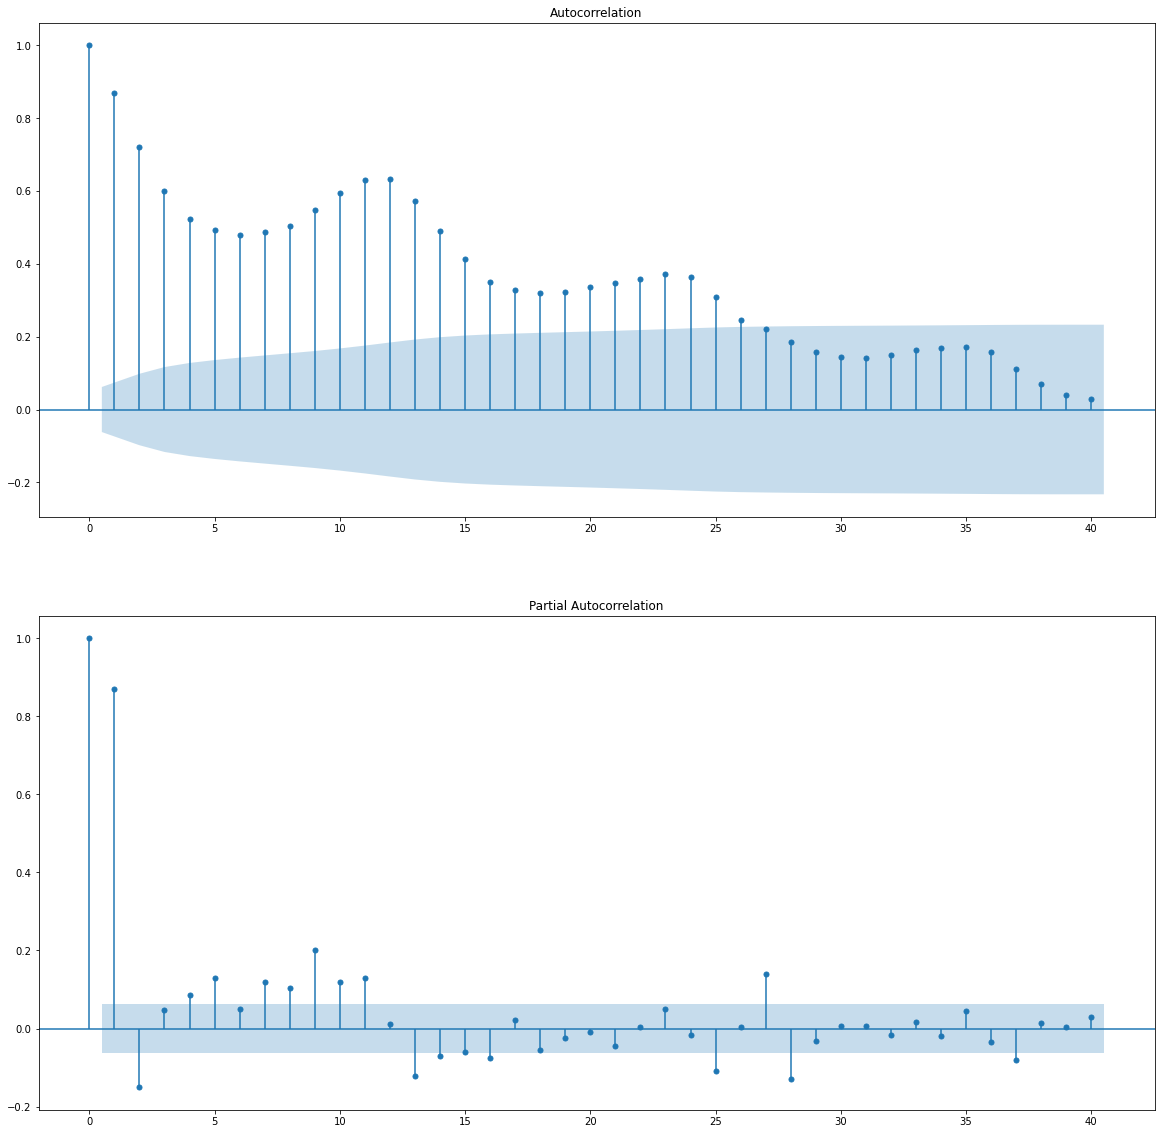

In [33]:
# Import library ACF and PACF :
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# PLot :
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(211)

fig = sm.graphics.tsa.plot_acf(df.AQI,lags=40,ax=ax1)

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.AQI,lags=40,ax=ax2)
plt.show()

### Interpretations:

**Acf**
* ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values.

**PACF**
* Partial autocorrelation computes the "pure" correlation between xt and xt−2 by removing the "transitive" correlation, that is, the amount of correlation explained by the first lag, and recomputing. For the partial autocorrelation between xt and xt−3, we will remove the correlation with both xt−1 and xt−2 and recompute, and so on.
* A partial autocorrelation is the amount of correlation between a variable and a lag of itself that is not explained by correlations at all lower-order-lags


### Define Accuracy Metrics

* **Root Mean Square Error (RMSE)** is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are, RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

* **The mean absolute percentage error (MAPE)**, also known as mean absolute percentage deviation (MAPD), is a measure of prediction accuracy of a forecasting method in statistics, for example in trend estimation, also used as a loss function for regression problems in machine learning.

In [187]:
# Defining Function for Accuracy metrics
def forecast_accuracy(forecast, actual):
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    mape = np.mean(np.abs((actual - forecast)/actual))*100  # MAPE
    rmse = np.sqrt(mean_squared_error(actual,forecast))  # RMSE
    return({'mape':mape, 'rmse':rmse})

In [188]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

def VAR_accuracy(predicted, valid):
    from sklearn.metrics import mean_squared_error
    for i in df.columns:
        print("rmse value for ",i,"is :' ",np.sqrt(mean_squared_error(valid[i], predicted[i])))
        print("mape value for ",i,"is :' ", MAPE(valid[i].values,predicted[i]), end = '\n\n')

In [265]:
def VAR_AQI_MAPE(predicted, valid):
    return (MAPE(valid['AQI'].values,predicted['AQI']))
    

In [266]:
def VAR_AQI_RMSE(predicted, valid):
    return (np.sqrt(mean_squared_error(valid['AQI'], predicted['AQI'])))

## Month Wise Analysis

In [34]:
# Prepare the data for Analysis :   (Purpose to make simple data for Time series)

month = data_fill.groupby([pd.Grouper(key='Datetime', freq='m')]).mean()

# Reset Index
month = month.reset_index()

# Setting Index
month = month.set_index('Datetime')

# Dropping the categorical
#week = week.drop('City', axis = 1)

# Check the dimensions of the data :
print(month.shape)

month.head()

(67, 13)


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Datetime,,,,,,,,,,,,,
2015-01-31,115.626374,102.625129,27.333253,22.896800,27.163934,26.003885,7.386084,48.106470,26.942947,4.970383,6.664869,4.029892,243.268204
2015-02-28,115.246795,96.729602,24.822801,23.918228,29.622047,28.875746,6.994889,42.371720,32.767689,7.781326,8.386841,4.901203,264.680255
2015-03-31,104.663947,82.585133,23.014788,22.562654,33.635110,17.837997,6.502632,29.145404,35.985411,22.864278,13.938244,4.417558,242.644118
2015-04-30,60.693429,90.022767,22.770123,21.891986,27.774906,18.019438,3.683389,29.321697,35.328833,3.268097,4.967285,3.969249,176.765625
2015-05-31,57.774039,101.888356,22.889909,23.422203,28.217519,21.213410,4.154859,27.231191,35.725824,3.466907,4.659611,4.448766,175.865621


## Base Model - ARIMA 

In [182]:
#creating Train test split
train_month=month[:int(0.8*(len(month)))]
print('Train shape', train_month.shape)

valid_month=month[int(0.8*(len(month))):]
print('Test shape', valid_month.shape)

Train shape (53, 13)
Test shape (14, 13)


* Let's build a base model with ARIMA (Autoregressive Integrated Moving Average) for univariate analysis on AQI column :
* Here concidering, p=1, q=1, d=1.

In [183]:
# Fitting the model

model = ARIMA(train_month.AQI,  order=(1,1,1)) 
model_fit=model.fit()
model_fit.summary()

C:\Users\Samruddhi Bhor\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Samruddhi Bhor\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.AQI   No. Observations:                   52
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -253.050
Method:                       css-mle   S.D. of innovations             30.822
Date:                Tue, 30 Mar 2021   AIC                            514.099
Time:                        18:50:23   BIC                            521.904
Sample:                    02-28-2015   HQIC                           517.091
                         - 05-31-2019                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.9622      1.066     -0.902      0.367      -3.052       1.127
ar.L1.D.AQI     0.7822      0.095      8.252      0.000       0.596       0.968
ma.L1.D.AQI    -1.0000      0.047    -21.435      0.000      -1.091      -0.909
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2784           +0.0000j            1.2784            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

### Interpretations: 

*  ARIMA(1,1,1) gives good result, pvalue for AR.L1 and MA.L1 is less than the 0.05.
* Auto arima model gives the best order for ARIMA.
* Let's run the Auto ARIMA and find the best order for this.

## Auto - ARIMA (Month wise - Univariate)

In [37]:
# Import the library:
from pmdarima import auto_arima

stepwise_fit = auto_arima(train_month.AQI, trace = True, suppress_warnings = True, seasonal = False)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=712.840, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=527.668, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=523.009, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=524.828, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=524.878, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=523.070, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=505.704, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=520.518, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=503.179, Time=0.14 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=499.934, Time=0.32 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=501.724, Time=0.15 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=499.748, Time=0.3

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   53
Model:               SARIMAX(3, 0, 2)   Log Likelihood                -241.386
Date:                Tue, 30 Mar 2021   AIC                            496.773
Time:                        17:18:28   BIC                            510.565
Sample:                             0   HQIC                           502.077
                                 - 53                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    107.1847     34.274      3.127      0.002      40.008     174.361
ar.L1          0.7316      0.350      2.092      0.036       0.046       1.417
ar.L2          0.3873      0.471      0.822      0.411      -0.536       1.311
ar.L3         -0.6795      0.287     -2.371      0.018      -1.241      -0.118
ma.L1          0.2819      0.766      0.368      0.713      -1.219       1.783
ma.L2         -0.6935      0.380     -1.824      0.068      -1.439       0.052
sigma2       491.1041    283.665      1.731      0.083     -64.869    1047.077
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 0.29
Prob(Q):                              0.63   Prob(JB):                         0.86
Heteroskedasticity (H):               1.73   Skew:                            -0.06
Prob(H) (two-sided):                  0.26   Kurtosis:                         2.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Interpretations :

* Auto arima is used for finding best order for ARIMA.
* ARIMA(3,0,2) gives good result than the ARIMA(1,1,1), when compared by AIC value.

## SARIMAX Model ( Month wise - Univariate Analysis)

* To consider the seasonality in ARIMA model, we will build SARIMAX model on the basis of ARIMA order.

In [226]:
mod_month = sm.tsa.statespace.SARIMAX(train_month.AQI,
                                order=(3, 0, 2),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False)
result_month = mod_month.fit()
result_month.summary()

C:\Users\Samruddhi Bhor\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Samruddhi Bhor\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Samruddhi Bhor\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                AQI   No. Observations:                   53
Model:             SARIMAX(3, 0, 2)x(3, 0, 2, 12)   Log Likelihood                -244.335
Date:                            Tue, 30 Mar 2021   AIC                            510.671
Time:                                    19:44:05   BIC                            532.344
Sample:                                01-31-2015   HQIC                           519.005
                                     - 05-31-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9258      2.076      0.446      0.656      -3.144       4.995
ar.L2          0.9998      2.544      0.393      0.694      -3.987       5.986
ar.L3         -0.9256      2.487     -0.372      0.710      -5.800       3.949
ma.L1          0.0017      5.335      0.000      1.000     -10.454      10.457
ma.L2         -0.9983      6.570     -0.152      0.879     -13.874      11.878
ar.S.L12       0.3132    385.210      0.001      0.999    -754.684     755.311
ar.S.L24       0.2630    459.511      0.001      1.000    -900.362     900.888
ar.S.L36       0.2501     59.268      0.004      0.997    -115.913     116.413
ma.S.L12       0.0059    383.686   1.54e-05      1.000    -752.004     752.016
ma.S.L24      -0.0647    363.285     -0.000      1.000    -712.091     711.962
sigma2       615.3960   1045.001      0.589      0.556   -1432.767    2663.559
===================================================================================
Ljung-Box (L1) (Q):                   0.46   Jarque-Bera (JB):                 0.41
Prob(Q):                              0.50   Prob(JB):                         0.81
Heteroskedasticity (H):               0.92   Skew:                            -0.02
Prob(H) (two-sided):                  0.86   Kurtosis:                         2.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### On the basis of SARIMAX result we will plot the predicted values of valid set as well as future values of AQI for 2021.

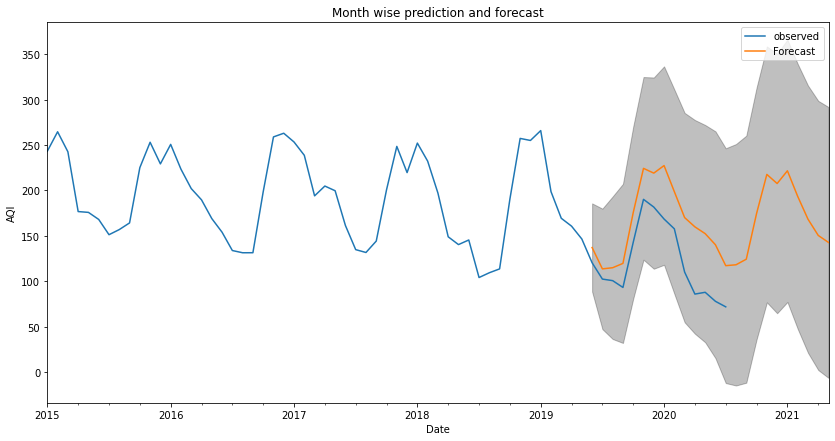

In [334]:
## Forecast for valid set and Future

pred_uc_month = result_month.get_forecast(steps=24)
pred_ci = pred_uc_month.conf_int()
ax = month.AQI.plot(label='observed', figsize=(14, 7))
pred_uc_month.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
plt.title("Month wise prediction and forecast")
plt.legend()
plt.show()

In [229]:
# Calculate Accuracy Metrics

forecast_accuracy(pred_uc_month.predicted_mean[:14], valid_month.AQI)

{'mape': 39.10279939413575, 'rmse': 45.74723461890217}

### Interpretations:

* This graph is giving us the observed values with forecasted values and Confidence Interval.
* Actual value of valid set has decreased as compared to the forecasted values on the basis of observed AQI.

## Vector Auto Regression (month wise - multivariate) 

In [105]:
from statsmodels.tsa.vector_ar.var_model import VAR

# Fitting the VAR model
VAR_model_month=VAR(endog=train_month)
VAR_model_month_fit=VAR_model_month.fit()

# Predicting on Validation set
predict_month=VAR_model_month_fit.forecast(VAR_model_month_fit.y,steps=len(valid_month))

pred_month=pd.DataFrame(predict_month,columns=df.columns,index=range(0,len(predict_month)))

C:\Users\Samruddhi Bhor\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [153]:
VAR_accuracy(pred_month, valid_month)

rmse value for  PM2.5 is :'  29.209158667257
mape value for  PM2.5 is :'  78.16763267561352

rmse value for  PM10 is :'  49.00428839553765
mape value for  PM10 is :'  59.437600896318976

rmse value for  NO is :'  5.364627008792448
mape value for  NO is :'  31.2702466283389

rmse value for  NO2 is :'  10.291716535349202
mape value for  NO2 is :'  49.923145985770084

rmse value for  NOx is :'  9.369325093162265
mape value for  NOx is :'  31.44868503812

rmse value for  NH3 is :'  7.9259806985279635
mape value for  NH3 is :'  42.78577722370022

rmse value for  CO is :'  1.9849768370296057
mape value for  CO is :'  168.9230991537603

rmse value for  SO2 is :'  6.090576293837587
mape value for  SO2 is :'  42.922820894374055

rmse value for  O3 is :'  4.713651316194199
mape value for  O3 is :'  13.186610003637366

rmse value for  Benzene is :'  3.533897182996733
mape value for  Benzene is :'  50.67765428844437

rmse value for  Toluene is :'  3.049093423475953
mape value for  Toluene is :'  2

In [267]:
VAR_AQI_MAPE(pred_month, valid_month)

55.32399442476029

In [268]:
VAR_AQI_RMSE(pred_month, valid_month)

62.86211123993698

### Interpretations:

* VAR has considered all the variables and gives the RMSE and MAPE value for all the variables.

## Week wise Analysis

In [206]:
# Prepare the data for Analysis :   (Purpose to make simple data for Time series)

week = data_fill.groupby([pd.Grouper(key='Datetime', freq='w')]).mean()

# Reset Index
week = week.reset_index()

# Setting Index
week = week.set_index('Datetime')

# Dropping the categorical
#week = week.drop('City', axis = 1)

# Check the dimensions of the data :
print(week.shape)

# Check first five values
week.head()

(288, 13)


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Datetime,,,,,,,,,,,,,
2015-01-04,125.657474,107.843518,25.778010,18.155517,26.060761,21.105531,5.954041,54.034148,24.163756,2.381765,7.408040,4.352879,256.202864
2015-01-11,117.429355,111.352032,31.158074,27.726199,30.303633,32.169839,12.110954,51.156563,25.519372,5.741671,7.216626,3.768868,244.014717
2015-01-18,116.255816,107.782003,28.464874,25.055697,31.622798,32.417200,7.616460,46.074239,26.342713,6.193882,9.031614,4.338384,244.241758
2015-01-25,111.765231,94.098663,23.918904,19.715085,22.036165,21.413642,5.158916,47.502531,25.548170,5.175461,5.573735,3.943733,239.419479
2015-02-01,113.766948,96.629668,27.302812,22.447721,27.028725,20.160568,5.774473,43.489088,33.125827,3.985243,4.338189,4.369146,248.518413


In [207]:
#creating Train test split
train_week=week[:int(0.8*(len(week)))]
print('Train shape', train_week.shape)

valid_week=week[int(0.8*(len(week))):]
print('Test shape', valid_week.shape)

Train shape (230, 13)
Test shape (58, 13)


### Auto ARIMA on week wise data

In [208]:
from pmdarima import auto_arima

stepwise_fit_week = auto_arima(train_week.AQI, trace = True, suppress_warnings = True, seasonal = False)

stepwise_fit_week.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2080.271, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3088.536, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2814.051, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2080.445, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2080.578, Time=0.15 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=2081.768, Time=0.22 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=2081.551, Time=0.39 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2078.697, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2626.219, Time=0.31 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2071.144, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2280.053, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2075.085, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  230
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -1031.478
Date:                Tue, 30 Mar 2021   AIC                           2070.956
Time:                        19:22:46   BIC                           2084.708
Sample:                             0   HQIC                          2076.503
                                - 230                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     15.3261      6.741      2.274      0.023       2.115      28.538
ar.L1          0.7574      0.053     14.392      0.000       0.654       0.861
ar.L2          0.1630      0.057      2.876      0.004       0.052       0.274
sigma2       456.9428     34.210     13.357      0.000     389.892     523.994
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                21.66
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.96   Skew:                             0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## SARIMAX Model ( Week wise - Univariate Analysis)

* To consider the seasonality in ARIMA model, we will build SARIMAX model on the basis of ARIMA order.

In [216]:
mod_week = sm.tsa.statespace.SARIMAX(train_week.AQI,
                                order=(2, 0, 0),
                                seasonal_order=(2, 0, 0, 52),
                                enforce_stationarity=True,
                                enforce_invertibility=False)
result_week = mod_week.fit()
result_week.summary()

C:\Users\Samruddhi Bhor\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
C:\Users\Samruddhi Bhor\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                AQI   No. Observations:                  230
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 52)   Log Likelihood               -1029.427
Date:                            Tue, 30 Mar 2021   AIC                           2068.854
Time:                                    19:38:23   BIC                           2086.044
Sample:                                01-04-2015   HQIC                          2075.788
                                     - 05-26-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7351      0.051     14.536      0.000       0.636       0.834
ar.L2          0.2543      0.051      4.963      0.000       0.154       0.355
ar.S.L52       0.2016      0.073      2.769      0.006       0.059       0.344
ar.S.L104      0.2050      0.091      2.245      0.025       0.026       0.384
sigma2       428.8042     32.367     13.248      0.000     365.367     492.242
===================================================================================
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):                17.93
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               1.83   Skew:                             0.20
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

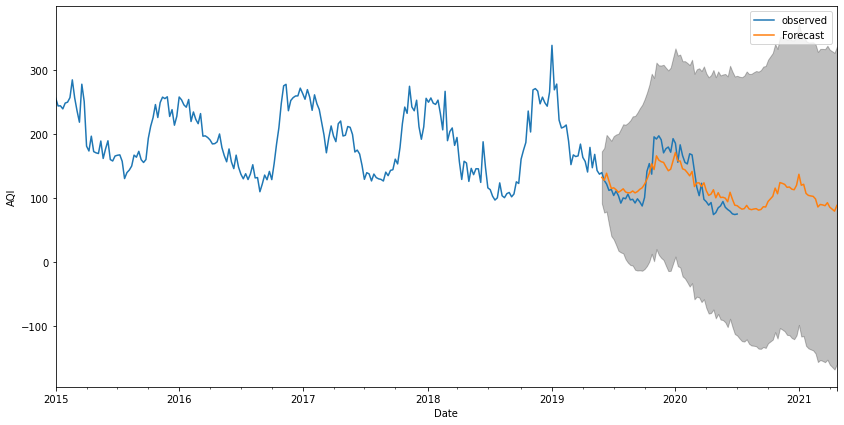

In [243]:
## Forecast for valid set and Future

pred_uc_week = result_week.get_forecast(steps=100)
pred_ci = pred_uc_week.conf_int()
ax = week.AQI.plot(label='observed', figsize=(14, 7))
pred_uc_week.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
plt.legend()
plt.show()

In [245]:
# Calculate Accuracy Metrics

forecast_accuracy(pred_uc_week.predicted_mean[:len(valid_week.AQI)], valid_week.AQI)

{'mape': 15.322580803502529, 'rmse': 20.914404072797943}

### Interpretations:

* This graph is giving us the observed values with forecasted values and Confidence Interval.
* Actual value of valid set has decreased as compared to the forecasted values on the basis of observed AQI.

### Vector Auto Regression (week wise)

In [198]:
from statsmodels.tsa.vector_ar.var_model import VAR

# Fitting the VAR model
VAR_model_week=VAR(endog=train_week)
VAR_model_week_fit=VAR_model_week.fit()

# Predicting on Validation set
predict_week=VAR_model_week_fit.forecast(VAR_model_week_fit.y,steps=len(valid_week))

pred_week=pd.DataFrame(predict_week,columns=df.columns,index=range(0,len(predict_week)))

C:\Users\Samruddhi Bhor\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


In [199]:
VAR_accuracy(pred_week, valid_week)

rmse value for  PM2.5 is :'  29.741865606304934
mape value for  PM2.5 is :'  79.80420954376062

rmse value for  PM10 is :'  43.22325894272324
mape value for  PM10 is :'  50.33683076180237

rmse value for  NO is :'  5.837850894687454
mape value for  NO is :'  35.0749472314787

rmse value for  NO2 is :'  8.413428251770458
mape value for  NO2 is :'  38.23684917520316

rmse value for  NOx is :'  9.535680446094874
mape value for  NOx is :'  29.43510507047128

rmse value for  NH3 is :'  6.440898331569066
mape value for  NH3 is :'  31.16311600555324

rmse value for  CO is :'  2.144679666373587
mape value for  CO is :'  174.90457569892456

rmse value for  SO2 is :'  6.092524108993632
mape value for  SO2 is :'  43.47844017531035

rmse value for  O3 is :'  4.347345367583176
mape value for  O3 is :'  11.758219450478785

rmse value for  Benzene is :'  4.2648544162446385
mape value for  Benzene is :'  33.84950064213725

rmse value for  Toluene is :'  4.733871618234821
mape value for  Toluene is :' 

### Interpretations:

* Here we can see that the RMSE and MAPE values of AQI are very high. So, we can infer that SARIMAX model is performing well for predicting AQI

## Comparative Analysis

In [331]:
results=pd.DataFrame(res,columns=["Model_Name","RMSE","MAPE"])

In [332]:
res=[["SARIMAX Month wise",(forecast_accuracy(pred_uc_month.predicted_mean[:14], valid_month.AQI)['rmse']),forecast_accuracy(pred_uc_month.predicted_mean[:14], valid_month.AQI)['mape']],
     ["VAR MONTH Wise",(VAR_AQI_RMSE(pred_month, valid_month)),VAR_AQI_MAPE(pred_month, valid_month)],
["SARIMAX Week Wise",(forecast_accuracy(pred_uc_week.predicted_mean[:len(valid_week.AQI)], valid_week.AQI)['rmse']),forecast_accuracy(pred_uc_week.predicted_mean[:len(valid_week.AQI)], valid_week.AQI)['mape']],
    ["VAR week Wise",(VAR_AQI_RMSE(pred_week, valid_week)),VAR_AQI_MAPE(pred_week, valid_week)]]

In [333]:
results

,Model_Name,RMSE,MAPE
0,SARIMAX Month wise,45.747235,39.102799
1,VAR MONTH Wise,62.862111,55.323994
2,SARIMAX Week Wise,20.914404,15.322581
3,VAR week Wise,61.936899,52.768557


### Interpretations:

* We can see that the RMSE and MAPE values of SARIMAX model are less than the VAR model. 
* It means SARIMAX model is performing best in forecasting AQI values.
* We have chosen SARIMAX model as our final model, therefore the forecasted values are visualised through graphical respresentation.

## SUMMARY

* We applied statistical tests to chect the effect of pollutants on AOI.
* We checked the Stationarity of the data.
* Plotted ACF and PACF graphs to get the order of ARIMA model.
* Fitted Auto ARIMA model for getting the best order.
* The orders given by Auto arima are utilised to build an SARIMAX model.
* Multivariate analysis is done using Vector Auto Regression.
* Monthwise and Weekwise Analysis is done by fitting all the models for both.

# CONCLUSIONS

* We have done a Univariate and Multivariate analysis on AQI.
* Surprisingly we could see that AQI is increasing at night and is less in the day. The reason is that the wind decraese at night due to which the pollutants tend to settle down on the earth's surface leading to increase in AQI.
* Univariate Analysis is done by using ARIMA, Auto-ARIMA and SARIMAX models.
* Multivariate Analysis is done by using VAR model.
* We have recieved the best results for predicting AQI through SARIMAX, therefore we chose SARIMAX as our final model and the forecasted values are visualized through graphical representation.
* From the predicted values we could observe that the AQI for 2020 is predicted to be very high on the basis of the previous data, but the actual values of AQI are very less in 2020. The reason for the decrease might be the pandemic which lead to lockdown and hence decrease in pollutants.
* From the forecasted graph we can conclude that AQI will be high for coming year 2021. The focus should be on how the pollutants affecting AQI can be reduced.
* According to our analysis the pollutants affecting the most on AQI are PM2.5, NO2 and CO on the basis of Correlation and Statistical Analysis.